In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpwrbo3k_7GP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
# same as customweights 8
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 10

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpwrbo3k_7GP2/unet_0.model
History saved to /tmp/tmpwrbo3k_7GP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 10s 104ms/step - loss: 0.7310 - dice_coeff: 0.4890
Model saved to /tmp/tmpwrbo3k_7GP2/cnnd_0.model
History saved to /tmp/tmpwrbo3k_7GP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 0.0436 - accuracy: 0.9967
Found 305 machine labels.
Replacing 101 from 305 !
Removed: 88 Filled: 88
TOOK 2269.7976348400116 seconds
***
RUN: 1
Model saved to /tmp/tmpwrbo3k_7GP2/unet_1.model
History saved to /tmp/tmpwrbo3k_7GP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 10s 103ms/step - loss: 0.5171 - dice_coeff: 0.6142
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 0.0877 - accuracy: 0.9867
Found 289 machine labels.
Replacing 96 from 289 !
Removed: 83 Filled: 83
TOOK 1783.97563171

In [10]:
R.classifier_scores

[[0.7310047149658203, 0.48899316787719727],
 [0.517146110534668, 0.6141547560691833],
 [0.31024983525276184, 0.7613860368728638],
 [0.16622239351272583, 0.8776618242263794],
 [0.09770449995994568, 0.9385371208190918],
 [0.07951083034276962, 0.9600946307182312],
 [0.07893149554729462, 0.9622582197189331],
 [0.07331585884094238, 0.9648647904396057],
 [0.07649099826812744, 0.9646122455596924],
 [0.07612162083387375, 0.9653297662734985]]

In [11]:
R.discriminator_scores

[[0.04363982379436493, 0.996666669845581],
 [0.0877300575375557, 0.9866666793823242],
 [0.6804488897323608, 0.8983333110809326],
 [1.4094970226287842, 0.875],
 [1.8269604444503784, 0.8550000190734863],
 [2.3454513549804688, 0.8316666483879089],
 [2.1975278854370117, 0.8416666388511658],
 [1.987399697303772, 0.8333333134651184],
 [2.7886767387390137, 0.7883333563804626],
 [2.5026330947875977, 0.8083333373069763]]

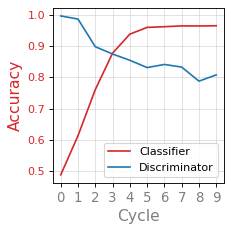

In [12]:
R.plot()